In [7]:
include("./perov_functions.jl")
using Plots
using BenchmarkTools
using Distributions
using LaTeXStrings
using Measures

In [2]:
n=2;nk=100;
system_original=make_symstem(n);
system=copy(system_original);

In [16]:
s1=make_symstem(n);
s2=make_system_wo(n);
for i in 1:length(s1)
    println(round.(s1[i].cl2-s2[i].cl2,digits=3))
    end;

[-0.0, -0.0, -0.0]
[-0.0, -0.0, 0.0]
[-0.0, 0.0, 0.0]
[-0.0, 0.0, 0.0]
[-0.0, -0.0, 0.0]
[-0.0, -0.0, 0.0]
[-0.0, 0.0, 0.0]
[-0.0, 0.0, 0.0]


In [ ]:
function e1(system)
    axis=rand(Uniform(-1.,1.),3)
    theta=rand(Uniform(0,2π))
    pos=rand(1:size(system)[1],3)
    s,s1=get_rotation_energy_1(system,1,1/250,pos,axis,theta);
    if s<0
        system=s1
        end;
    e=get_total_energy_mag(system,1,1/150)
    return e
    end;

In [14]:
function run_sum(n,system,g1,g2)
    e=[]
    a1=[]
    a2=[]
    a3=[]
    mag_val=[]
    for i in 1:n
        axis=rand(Uniform(-1.,1.),3)
        theta=rand(Uniform(0,2π))
        pos=rand(1:size(system)[1],3)
        s,s1=get_rotation_energy_1(system,g1,g2,pos,axis,theta);
        if s<0
            system=s1
            end;
        if i%100==0
            vals=get_total_energy_mag(system,g1,g2)
            energy=vals[1]
            angles=vals[2].^2
            push!(e,energy)
            push!(a1,angles[1])
            push!(a2,angles[2])
            push!(a3,angles[3])
            push!(mag_val,norm(vals[2]))
            end;
        end;
    return e,a1,a2,a3,mag_val,system
    end;

In [45]:
system=copy(system_original);
@time e,a1,a2,a3,mag_val,system=run_sum(60000,system,1,1/950);

 29.081049 seconds (309.01 M allocations: 34.007 GiB, 25.15% gc time)


In [48]:
function animplots(i)
gr()
pl1=plot((1:i)*100,e[1:i],ylabel="energy",xlabel="iterations",color=RGB(226/255, 194/255, 144/255),label="",linewidth=2)
pl2=plot((1:i)*100,a1[1:i],label=L"$s_x$",xlabel="iterations",ylabel="component",ylim=(-0.01,1.1),linewidth=1.5)
plot!(pl2,(1:i)*100,a2[1:i],label=L"$s_y$",linewidth=1.5)
plot!(pl2,(1:i)*100,a3[1:i],label=L"$s_z$",linewidth=1.5)
pl3=plot((1:i)*100,mag_val[1:i],ylabel=L"$M$",xlabel="iterations",color=RGB(202/255, 255/255, 191/255),linewidth=2,label="",ylim=(-0.01,1.1))
hline!(pl3,[1],linestyle=:dash,color="grey",label="")
hline!(pl2,[1/3],linestyle=:dash,color="grey",label="")
plot(pl1,pl3,pl2,size=(1200,400),dpi=100,bottom_margin=5mm,layout=@layout [a b c])
end;

In [ ]:
anim = @animate for i ∈ 1:length(e)
    animplots(i)
end
gif(anim, "animations/MC_3.gif", fps = 17)

In [4]:
cnt=0
for i in 1:100
    axis=rand(Uniform(-1.,1.),3)
    theta=rand(Uniform(0,2π))
    pos=rand(1:size(system)[1],3)
    dE,s1=get_rotation_energy_1(system,1,1/250,pos,axis,theta);
    T=.2
    if dE < 0 || rand() < exp(-dE/T)
        cnt+=1
    end
end
print(cnt)

19

# Plot of Monoclinic !

In [ ]:
plotly()
pl=plot()
system=copy(system_original);
axis=[0,1,0.]
system[1,2,1]=rot_tetra_test_1(system[1,2,1],axis,pi)
system[2,1,1]=rot_tetra_test_1(system[2,1,1],axis,pi)
system[1,2,2]=rot_tetra_test_1(system[1,2,2],axis,pi)
system[2,1,2]=rot_tetra_test_1(system[2,1,2],axis,pi)
coords=[[0,0,1],[0,1,0],[1,0,0]]*15
for i in coords
    plot!(pl,[0,i[1]],[0,i[2]],[0,i[3]],linewidth=5,color="red",linestyle=:dash,label="")
    end;
t=get_total_energy_mag(system,0,1)[2]*10
plot!(pl,[0,t[1]],[0,t[2]],[0,t[3]],linewidth=2,color="yellow",label="")
for i in system
    plot_tetra(i,pl)
    t=get_dipol_vec(i)
    plot!(pl,[0,t[1]],[0,t[2]],[0,t[3]],linewidth=5,color="white",label="")
    end;
display(pl)

# Get coupling constant

In [38]:
function get_g(de)
    n=2
    system_original=make_symstem(n);
    system=copy(system_original);
    axis=[0,1,0.]
    system[1,2,1]=rot_tetra_test_1(system[1,2,1],axis,pi)
    system[2,1,1]=rot_tetra_test_1(system[2,1,1],axis,pi)
    system[1,2,2]=rot_tetra_test_1(system[1,2,2],axis,pi)
    system[2,1,2]=rot_tetra_test_1(system[2,1,2],axis,pi)
    u_m=get_total_energy_mag(system,0,1)[1]
    d_m=get_total_energy_mag(system,1,0)[1]
    u_p=get_total_energy_mag(system_original,0,1)[1]
    d_p=get_total_energy_mag(system_original,1,0)[1];
    return (de-(d_p-d_m))/(u_p-u_m)
end;

In [52]:
g=get_g(-0.095)
Ep =g*get_total_energy_mag(system,0,1)[1]+get_total_energy_mag(system,1,0)[1]
Em=g*get_total_energy_mag(system_original,0,1)[1]+get_total_energy_mag(system_original,1,0)[1];
println("g=$g  Check δE(0.095)=$(Ep-Em)") #= =0.095? =#

g=0.0032311983843898487  Check δE(0.095)=0.09500000000000008


# MC with new g value

In [55]:
function run_sum(n,system,g1,g2)
    e=[]
    a1=[]
    a2=[]
    a3=[]
    mag_val=[]
    for i in 1:n
        axis=rand(Uniform(-1.,1.),3)
        theta=rand(Uniform(0,2π))
        pos=rand(1:size(system)[1],3)
        s,s1=get_rotation_energy_1(system,g1,g2,pos,axis,theta);
        if s<0
            system=s1
            end;
        if i%100==0
            vals=get_total_energy_mag(system,g1,g2)
            energy=vals[1]
            angles=vals[2].^2
            push!(e,energy)
            push!(a1,angles[1])
            push!(a2,angles[2])
            push!(a3,angles[3])
            push!(mag_val,norm(vals[2]))
            end;
        end;
    return e,a1,a2,a3,mag_val,system
    end;


In [93]:
g=get_g(-0.095)
n=5;nk=100;
system=make_symstem(n);

In [102]:
@time e,a1,a2,a3,mag_val,system=run_sum(000,system,0,1);

 31.919422 seconds (349.36 M allocations: 38.381 GiB, 21.63% gc time)


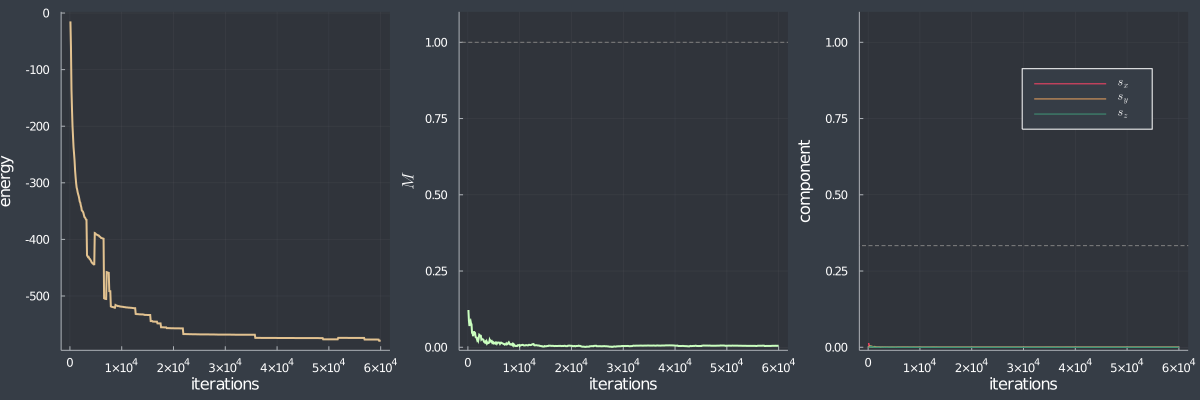

In [103]:
function animplots(i)
gr()
pl1=plot((1:i)*100,e[1:i],ylabel="energy",xlabel="iterations",color=RGB(226/255, 194/255, 144/255),label="",linewidth=2)
pl2=plot((1:i)*100,a1[1:i],label=L"$s_x$",xlabel="iterations",ylabel="component",ylim=(-0.01,1.1),linewidth=1.5)
plot!(pl2,(1:i)*100,a2[1:i],label=L"$s_y$",linewidth=1.5)
plot!(pl2,(1:i)*100,a3[1:i],label=L"$s_z$",linewidth=1.5)
pl3=plot((1:i)*100,mag_val[1:i],ylabel=L"$M$",xlabel="iterations",color=RGB(202/255, 255/255, 191/255),linewidth=2,label="",ylim=(-0.01,1.1))
hline!(pl3,[1],linestyle=:dash,color="grey",label="")
hline!(pl2,[1/3],linestyle=:dash,color="grey",label="")
plot(pl1,pl3,pl2,size=(1200,400),dpi=100,bottom_margin=5mm,layout=@layout [a b c])
end;
animplots(length(e))

In [104]:
empty!(Out)

Dict{Int64,Any} with 1 entry:
  104 => Dict{Int64,Any}(#= circular reference @-1 =#)